2025 CCADD Winter Internship - Book Reading Session

#### ***Copyright Notice***

This notebook was created as part of an internship program for educational and non-commercial purposes. It is based on content from *R for Data Science* (2nd edition) by Hadley Wickham, Mine Cetinkaya-Rundel, and Garrett Grolemund. The original book is licensed under the Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License. 

This notebook is not a substitute for the original book, and participants are encouraged to refer to the official publication for comprehensive understanding. 

© Nayoung Ku, 2025. All rights reserved. Redistribution of this notebook is permitted for educational purposes only with proper attribution.

# Chapter 16: Factors
* https://r4ds.hadley.nz/factors

## 0. Introduction
### What is factor
Categorical data, often stored as "factors" in R, represents variables with a  fixed set of possible values.

* Factors are **R's data structure** for **categorical** data.
* They have **defined** set of levels, which helps enforce data integrity and allows for efficient storage
    * Example: days of the week, survey responses
* They may be ordered or unordered 

### Why is it important?
* By restricting variables to predefined levels
    * **Data integrity**: Prevents invalid categories.      
* By leveraging the levels' structure,
    * **Accurate analysis**: Enables proper statistical modeling and summarization.
    * **Effective visualization**: Controls the order and grouping in plots.

### Objectives:
1. **Create** `factor` variables
2. Explore the **General Social Survey** dataset via `forcats::gss_cat`
3. **Reorder** factor levels
4. **Modify** factor levels

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1. Create factors
### `factor()`: create factor from a character or numeric vector 

If the set is fixed and we **already know the possible values for it**, which are not in alphabetical order, it is useful to display it as a factor.

In [2]:
### Example: Month

# Create a list of the valid levels
month_levels <- c(
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
)

In [3]:
x1 <- c("Dec", "Apr", "Jan", "Mar")
x2 <- c("Dec", "Apr", "Jam", "Mar") # Issue #1: typo problem

In [4]:
print(class(x1))
print(x1) 
sort(x1) # Issue #2: Alphabetic order does not match with month level

[1] "character"
[1] "Dec" "Apr" "Jan" "Mar"


[1] "Apr" "Dec" "Jan" "Mar"

Using factors can fix the issues with strings

In [5]:
# Create a factor >> follow specific order
y1 <- factor(x1, levels = month_levels)
print(class(y1))
print(y1) #Before sort: same with chr
sort(y1) 

[1] "factor"
[1] Dec Apr Jan Mar
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec


[1] Jan Mar Apr Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [6]:
y2 <- factor(x2, levels = month_levels)
print(class(y2))
#**WARNING**: Value not in the level (typo) is automatically converted to NA
y2 

[1] "factor"


[1] Dec  Apr  <NA> Mar 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [7]:
print(factor(x1)) #not defining specific level -> alphabetic order

[1] Dec Apr Jan Mar
Levels: Apr Dec Jan Mar


In [8]:
levels(y1)

[1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

### `forcats::fct()`: similar with `factor()` but...

Error in `fct()`:
* All values of `x` must appear in `levels` or `na`
* Missing level: "Jam"

In [9]:
y2 <- fct(x2, levels = month_levels)

ERROR: [1m[33mError[39m in `fct()`:[22m
[1m[22m[33m![39m All values of `x` must appear in `levels` or `na`
[36mℹ[39m Missing level: "Jam"


### `col_factor()`: Define a column as factor when you read a file
* df <- read_csv(csv, col_types = cols(month = `col_factor(month_levels)`))

In [10]:
csv <- "
month,value
Jan,12
Feb,56
Mar,12
"

In [11]:
df <- read_csv(csv, col_types = cols(month = col_factor(month_levels)))
df$month

[1] Jan Feb Mar
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

### [Tip 💡] If you want to order the levels to match the order of the first appearance in the data:
1. `unique()`
2. `fct_inorder()`

In [12]:
x1 <- c('Dec','Apr','Jan','Mar',"Dec")
f1 <- factor(x1, levels = unique(x1)) 
f1

[1] Dec Apr Jan Mar Dec
Levels: Dec Apr Jan Mar

In [13]:
f2 <- x1 |> factor() |> 
fct_inorder()
sort(f2)

[1] Dec Dec Apr Jan Mar
Levels: Dec Apr Jan Mar

---
## 2. General Social Survey (`gss_cat`) Dataset

### Dataset introduction
* A tibble with 21483 obervations & 9 columns

In [14]:
head(gss_cat) #General Social Survey, a long-running US survey 

year,marital,age,race,rincome,partyid,relig,denom,tvhours
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2000,Never married,26,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12
2000,Divorced,48,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NA
2000,Widowed,67,White,Not applicable,Independent,Protestant,No denomination,2
2000,Never married,39,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4
2000,Divorced,25,White,Not applicable,Not str democrat,None,Not applicable,1
2000,Married,25,White,$20000 - 24999,Strong democrat,Protestant,Southern baptist,NA


In [ ]:
?gss_cat

In [16]:
gss_cat |>
    count(race)

race,n
<fct>,<int>
Other,1959
Black,3129
White,16395


When working with factors, the two most common operations are changing the order of the levels, and changing the values of the levels. Those operations are described in the sections below.

In [17]:
# What is the most common relig in this survey? 
gss_cat |>
    count(relig) |>
    arrange(desc(n)) 

relig,n
<fct>,<int>
Protestant,10846
Catholic,5124
None,3523
Christian,689
Jewish,388
Other,224
Buddhism,147
Inter-nondenominational,109
Moslem/islam,104


In [18]:
# What’s the most common partyid?
gss_cat |>
    count(partyid) |>
    arrange(desc(n)) 

partyid,n
<fct>,<int>
Independent,4119
Not str democrat,3690
Strong democrat,3490
Not str republican,3032
"Ind,near dem",2499
Strong republican,2314
"Ind,near rep",1791
Other party,393
No answer,154


In [19]:
levels(gss_cat$partyid)

[1] "No answer"          "Don't know"         "Other party"       
 [4] "Strong republican"  "Not str republican" "Ind,near rep"      
 [7] "Independent"        "Ind,near dem"       "Not str democrat"  
[10] "Strong democrat"

In [20]:
relig_summary <- gss_cat |>
  group_by(relig) |> 
  summarize(
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  ) |>
    arrange(desc(tvhours))

relig_summary

relig,tvhours,n
<fct>,<dbl>,<int>
Don't know,4.625000,15
Native american,3.461538,23
Protestant,3.145487,10846
Catholic,2.960297,5124
Inter-nondenominational,2.870370,109
Christian,2.790281,689
Other,2.725806,224
No answer,2.723404,93
None,2.710227,3523


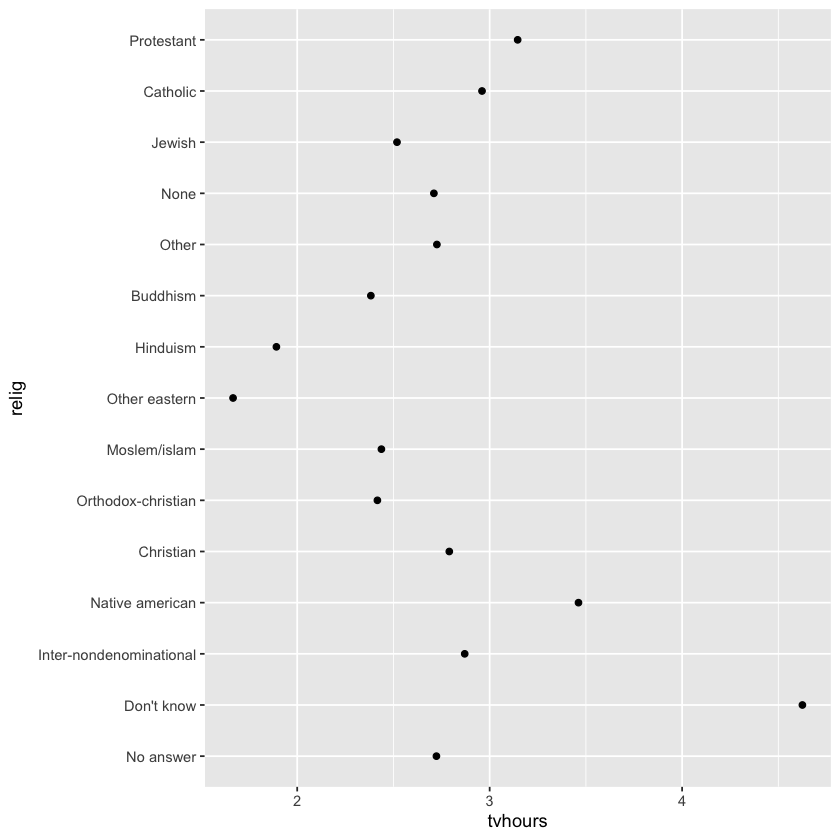

In [21]:
ggplot(relig_summary, aes(x = tvhours, y = relig)) +
  geom_point()

In [22]:
levels(gss_cat$relig)

[1] "No answer"               "Don't know"             
 [3] "Inter-nondenominational" "Native american"        
 [5] "Christian"               "Orthodox-christian"     
 [7] "Moslem/islam"            "Other eastern"          
 [9] "Hinduism"                "Buddhism"               
[11] "Other"                   "None"                   
[13] "Jewish"                  "Catholic"               
[15] "Protestant"              "Not applicable"

## 3. Reordering Factors

Factors can be reordered based on logical or statistical criteria:

### A. Use `fct_reorder()` to reorder levels based on another variable.
```R
fct_reorder(factor_var, numeric_var)
```

In [23]:
reordered_reli_tv <- relig_summary |>
    mutate(
        relig = fct_reorder(relig, tvhours) #relig(factor) is reorganized by tvhours
    ) |> arrange(relig)
    #ggplot(aes(x = tvhours, y = relig)) + 
    #geom_point()
reordered_reli_tv

relig,tvhours,n
<fct>,<dbl>,<int>
Other eastern,1.666667,32
Hinduism,1.891892,71
Buddhism,2.382716,147
Orthodox-christian,2.416667,95
Moslem/islam,2.437500,104
Jewish,2.518519,388
None,2.710227,3523
No answer,2.723404,93
Other,2.725806,224


In [24]:
levels(reordered_reli_tv$relig)
#print("=============")
levels(relig_summary$relig)

[1] "Other eastern"           "Hinduism"               
 [3] "Buddhism"                "Orthodox-christian"     
 [5] "Moslem/islam"            "Jewish"                 
 [7] "None"                    "No answer"              
 [9] "Other"                   "Christian"              
[11] "Inter-nondenominational" "Catholic"               
[13] "Protestant"              "Native american"        
[15] "Don't know"              "Not applicable"

[1] "No answer"               "Don't know"             
 [3] "Inter-nondenominational" "Native american"        
 [5] "Christian"               "Orthodox-christian"     
 [7] "Moslem/islam"            "Other eastern"          
 [9] "Hinduism"                "Buddhism"               
[11] "Other"                   "None"                   
[13] "Jewish"                  "Catholic"               
[15] "Protestant"              "Not applicable"

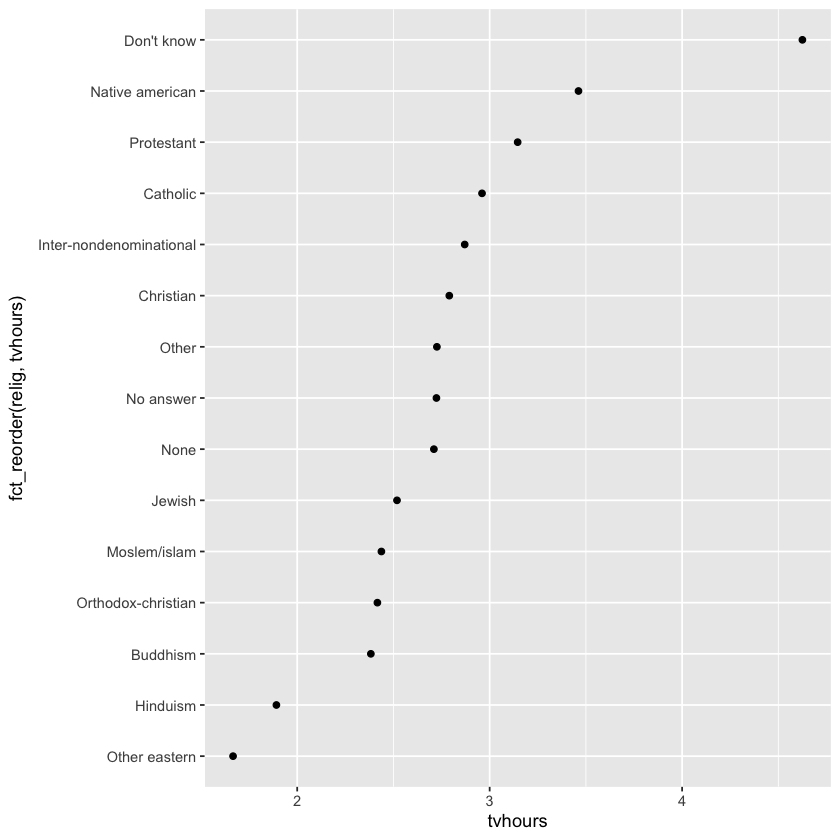

In [25]:
ggplot(relig_summary, aes(x = tvhours, y = fct_reorder(relig, tvhours))) +
  geom_point()

### B. Use `fct_relevel()` to move a level to the front or specify the exact order.
```R
fct_relevel(factor, levels) # any levels not mentioned will be left in their existing order
```

In [26]:
f <- factor(c("a", "b", "c", "d"), levels = c("b", "c", "d", "a"))
levels(fct_relevel(f))
levels(fct_relevel(f, "a"))
levels(fct_relevel(f, "b", "a"))

[1] "b" "c" "d" "a"

[1] "a" "b" "c" "d"

[1] "b" "a" "c" "d"

In [27]:
rincome_summary <- gss_cat |>
    group_by(rincome) |>
    summarize(
        age = mean(age, na.rm = TRUE),
        tvhours = mean(tvhours, na.rm = TRUE),
        n = n()
    ) 

rincome_summary

rincome,age,tvhours,n
<fct>,<dbl>,<dbl>,<int>
No answer,45.45029,2.904762,183
Don't know,45.60902,3.411290,267
Refused,47.61082,2.481973,975
$25000 or more,44.21217,2.234208,7363
$20000 - 24999,41.53365,2.784753,1283
$15000 - 19999,39.96180,2.912245,1048
$10000 - 14999,41.11301,3.016541,1168
$8000 to 9999,41.08235,3.148571,340
$7000 to 7999,38.24468,2.645455,188


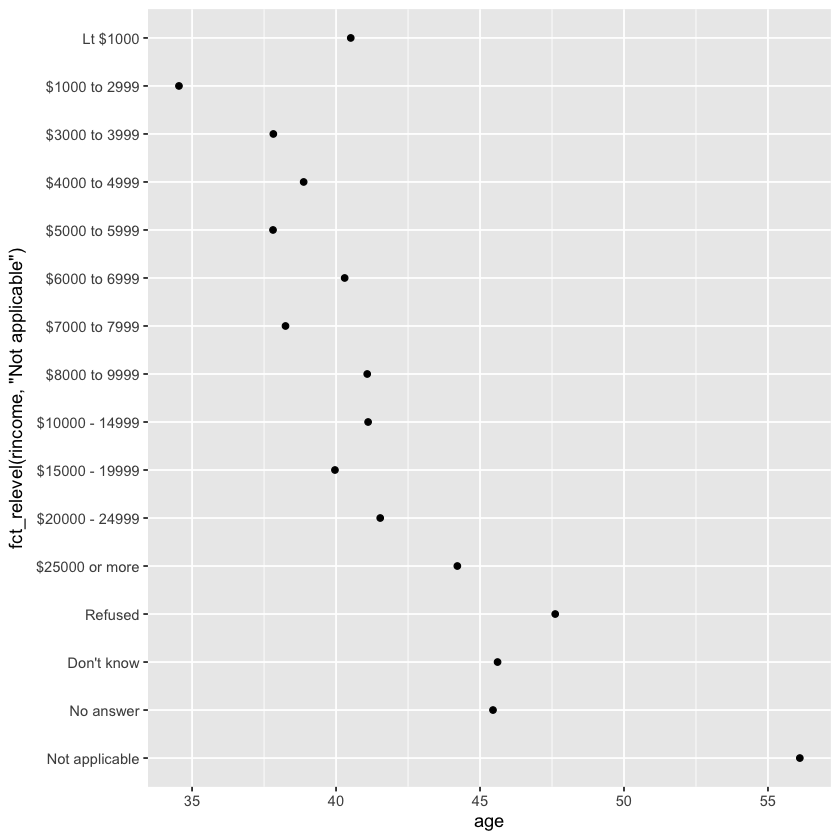

In [28]:
rincome_summary|>
    #ggplot(aes(x = age, y = rincome)) +
    ggplot(aes(x = age, y = fct_relevel(rincome,"Not applicable"))) +
        geom_point()

### C. For changing the order of a bar plot,
1. by number of observations with each level (largest first, decreasing manner): `fct_infreq()` 
2. Sort in reverse order: `fct_rev()`

In [29]:
levels(gss_cat$marital)

[1] "No answer"     "Never married" "Separated"     "Divorced"     
[5] "Widowed"       "Married"

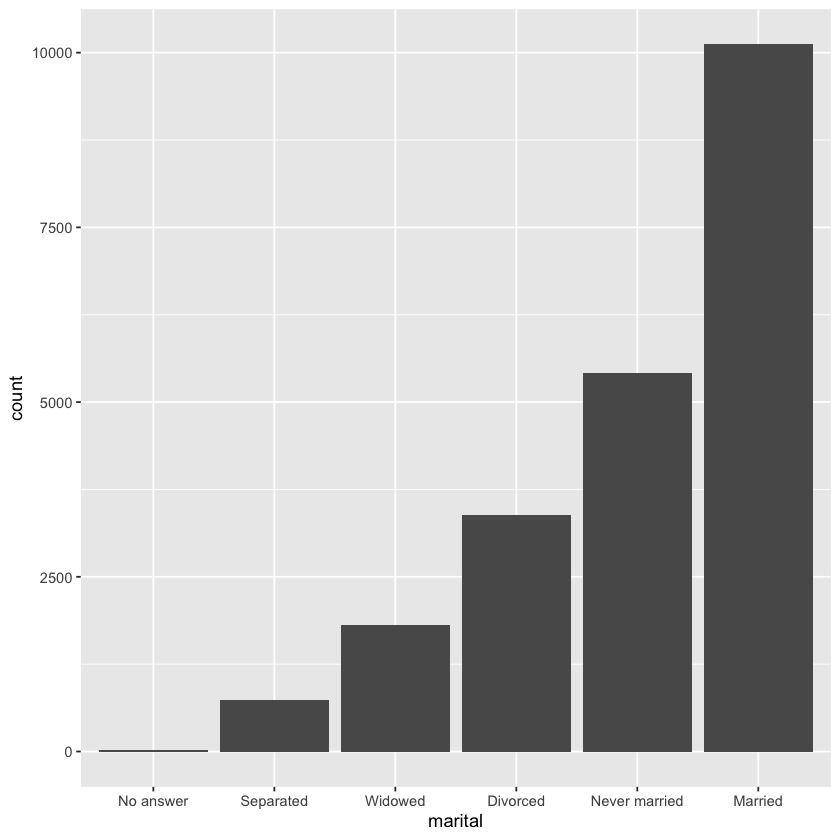

In [30]:
gss_cat |>
    mutate(
        marital = marital |> 
            fct_infreq() |>
            fct_rev()
          ) |>
    ggplot(aes(x = marital)) +
        geom_bar()

## 4. Modifying Factor Levels

We can change the values of the levels!

### A. **Rename** levels with `fct_recode()`:
```R
fct_recode(factor_var, "new_level" = "old_level" )
```

In [31]:
levels(gss_cat$partyid)

[1] "No answer"          "Don't know"         "Other party"       
 [4] "Strong republican"  "Not str republican" "Ind,near rep"      
 [7] "Independent"        "Ind,near dem"       "Not str democrat"  
[10] "Strong democrat"

In [32]:
gss_cat |>
    mutate(
        partyid = fct_recode(partyid, 
            # Changing name: <new name> = <old name>
            "Republican, strong" = "Strong republican",
            "Republican, weak" = "Not str republican",
            "Independent, near rep" = "Ind,near rep",
            "Independent, near dem" = "Ind,near dem",
            "Democrat, weak" = "Not str democrat",
            "Democrat, strong" = "Strong democrat",
            # Combine groups by recycling the name
            "Other" = "No answer",
            "Other" = "Don\'t know",
            "Other" = "Other party"
        )
    ) |>
    count(partyid)

partyid,n
<fct>,<int>
Other,548
"Republican, strong",2314
"Republican, weak",3032
"Independent, near rep",1791
Independent,4119
"Independent, near dem",2499
"Democrat, weak",3690
"Democrat, strong",3490


### B. **Collapse** levels with `fct_collapse()`:
```R
fct_collapse(factor_var, new_level = c("old_level1", "old_level2"))
```

In [33]:
# If you have too many levels: `fct_collapse()` is much useful! 
gss_cat |>
    mutate(
        partyid = fct_collapse(partyid,
            "other" = c("No answer","Don\'t know","Other party"),
            "rep" = c("Strong republican","Not str republican"),
            "ind" = c("Ind,near rep", "Independent", "Ind,near dem"),
            "dem" = c("Strong democrat","Not str democrat")                      
        )
    ) |>
    count(partyid)

partyid,n
<fct>,<int>
other,548
rep,5346
ind,8409
dem,7180


### C. **Lump** uncommon factor **together** with `fct_lump*()`:
```R
fct_lump_lowfreq(factor) #lumps together the least frequent levels into "Other"
fct_lump_min(factor, min = <input_minimum>) #lumps levels that appear fewer than minimum times
fct_lump_prop(factor, prop = p) #lumps levels that appear in fewer than prop * n times
``` 

In [ ]:
?fct_lump_lowfreq

In [34]:
gss_cat |>
    mutate(relig= fct_lump_lowfreq(relig) ) |>
    count(relig)
# 'No answer''Don\'t know''Other party' lumped together

relig,n
<fct>,<int>
Protestant,10846
Other,10637
